In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [596]:
df = pd.read_csv("../datasets/Fish.csv")

In [597]:
df.groupby(["Species"]).count()


#"Perch"

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


In [598]:
df_perch = df.loc[ df["Species"] == "Perch"]
df_perch = df_perch.drop(["Species"],axis=1)
#df_perch.insert(0, "Control", np.ones(56), True)

print(df_perch)



     Weight  Length1  Length2  Length3   Height   Width
72      5.9      7.5      8.4      8.8   2.1120  1.4080
73     32.0     12.5     13.7     14.7   3.5280  1.9992
74     40.0     13.8     15.0     16.0   3.8240  2.4320
75     51.5     15.0     16.2     17.2   4.5924  2.6316
76     70.0     15.7     17.4     18.5   4.5880  2.9415
77    100.0     16.2     18.0     19.2   5.2224  3.3216
78     78.0     16.8     18.7     19.4   5.1992  3.1234
79     80.0     17.2     19.0     20.2   5.6358  3.0502
80     85.0     17.8     19.6     20.8   5.1376  3.0368
81     85.0     18.2     20.0     21.0   5.0820  2.7720
82    110.0     19.0     21.0     22.5   5.6925  3.5550
83    115.0     19.0     21.0     22.5   5.9175  3.3075
84    125.0     19.0     21.0     22.5   5.6925  3.6675
85    130.0     19.3     21.3     22.8   6.3840  3.5340
86    120.0     20.0     22.0     23.5   6.1100  3.4075
87    120.0     20.0     22.0     23.5   5.6400  3.5250
88    130.0     20.0     22.0     23.5   6.1100 

In [612]:
y = df_perch["Weight"].values
X = df_perch.iloc[:,0:].values

print(gamma,mu)
gamma = df_perch.iloc[:,0:].std().values
print(gamma.shape)
mu = df_perch.iloc[:,0:].mean().values

lr = 0.3
EPOCH = 10


X = (X-mu)/gamma
df = pd.DataFrame(X) 
df.insert(0, "Control", np.ones(56), True)

print(df)
n = df.iloc[:,0:].shape[1]
m = df.iloc[0:].count()[0]
X = df.to_numpy()

theta = np.random.rand(n)

[347.61771724   8.56157226   9.021668     9.52950851   2.87817691
   1.7746262 ] [382.23928571  25.73571429  27.89285714  29.57142857   7.86186964
   4.74572321]
(6,)
    Control         0         1         2         3         4         5
0       1.0 -1.082624 -2.129949 -2.160671 -2.179696 -1.997747 -1.880804
1       1.0 -1.007542 -1.545944 -1.573197 -1.560566 -1.505769 -1.547663
2       1.0 -0.984528 -1.394103 -1.429099 -1.424148 -1.402926 -1.303781
3       1.0 -0.951445 -1.253942 -1.296086 -1.298223 -1.135952 -1.191306
4       1.0 -0.898226 -1.172181 -1.163073 -1.161805 -1.137480 -1.016678
5       1.0 -0.811924 -1.113781 -1.096566 -1.088349 -0.917063 -0.802492
6       1.0 -0.875212 -1.043700 -1.018975 -1.067361 -0.925124 -0.914177
7       1.0 -0.869459 -0.996980 -0.985722 -0.983412 -0.773430 -0.955426
8       1.0 -0.855075 -0.926899 -0.919216 -0.920449 -0.946526 -0.962976
9       1.0 -0.855075 -0.880179 -0.874878 -0.899462 -0.965844 -1.112191
10      1.0 -0.783157 -0.786738 -0.764034

In [613]:
mu

array([382.23928571,  25.73571429,  27.89285714,  29.57142857,
         7.86186964,   4.74572321])

In [614]:
def h(x):
    print(x)
    return x.dot(theta)

In [615]:
def J():
    A = (X.dot(theta)-y).transpose()
    B = (X.dot(theta)-y)
    return A.dot(B)/2*m

In [616]:
def Gradient():
    return theta - lr*X.transpose().dot(X.dot(theta)-y)/m

In [617]:
J_history = []
for i in range(EPOCH):
    theta = Gradient()
    J_history.append(J())

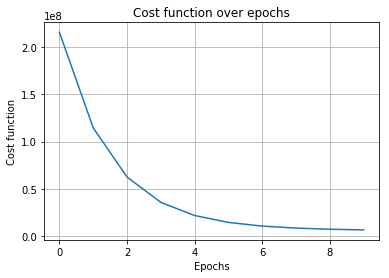

In [618]:
fig, ax = plt.subplots()
t= np.arange(0,EPOCH,1)
ax.plot(t,J_history)
ax.set(xlabel='Epochs', ylabel='Cost function',
       title='Cost function over epochs')
ax.grid()

In [619]:
# y = h(x)

df = pd.DataFrame(X)
G = df.iloc[:,0:].values

In [620]:
y_history = []
for i in range(m):
    y_history.append(h(G[i]))

[ 1.         -1.08262401 -2.12994924 -2.16067108 -2.17969568 -1.99774712
 -1.88080352]
[ 1.         -1.00754153 -1.54594435 -1.57319657 -1.56056617 -1.50576903
 -1.54766294]
[ 1.         -0.98452774 -1.39410308 -1.42909905 -1.4241478  -1.40292615
 -1.3037806 ]
[ 1.         -0.95144542 -1.25394191 -1.29608595 -1.29822315 -1.13595159
 -1.19130621]
[ 1.         -0.89822604 -1.17218123 -1.16307285 -1.16180478 -1.13748034
 -1.01667788]
[ 1.         -0.81192434 -1.11378074 -1.0965663  -1.08834874 -0.91706303
 -0.80249193]
[ 1.         -0.87521225 -1.04370015 -1.01897533 -1.0673613  -0.92512369
 -0.91417743]
[ 1.         -0.86945881 -0.99697976 -0.98572206 -0.98341153 -0.77343044
 -0.95542555]
[ 1.         -0.85507519 -0.92689918 -0.91921551 -0.92044921 -0.94652613
 -0.96297643]
[ 1.         -0.85507519 -0.88017879 -0.87487781 -0.89946177 -0.96584391
 -1.11219096]
[ 1.         -0.78315711 -0.78673801 -0.76403356 -0.74205596 -0.75373047
 -0.67097128]
[ 1.         -0.76877349 -0.78673801 -0.764

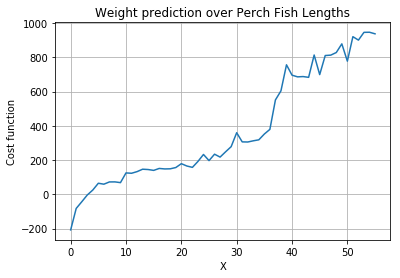

In [621]:
fig, ax = plt.subplots()
t= np.arange(0,m,1)
ax.plot(t,y_history)
ax.set(xlabel='X', ylabel='Cost function',
       title='Weight prediction over Perch Fish Lengths')
ax.grid()

In [622]:
print(h(G[3]))

[ 1.         -0.95144542 -1.25394191 -1.29608595 -1.29822315 -1.13595159
 -1.19130621]
-4.2530375574592085


In [623]:
## Normal equation
theta = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
J()
## Doesn't work either

6.379658018078463e-18

In [624]:
y[3]

51.5